<img src="lin-regress.jpg" alt="Drawing" style="width:800px;height:500px"/>

### Imports and Datasets

In [11]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn import linear_model 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow
import keras

## Simple Linear Regression Model 

We will use the most simple form of linear regression which is a straight-best-fit line: *`y = mx + b`* . M (or a) is commonly known as the slope and b is commonly known as the y-intercept. For this example, our line will have a slope of 1 and a y-intercept of 2. 

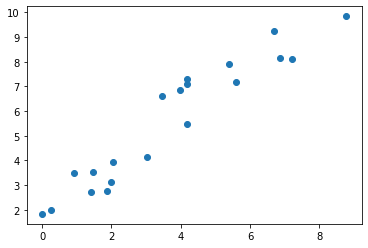

In [109]:
r = np.random.RandomState(1)
x = 10 * r.rand(20)
y = x + 2 + r.randn(20)
plt.scatter(x,y);

We can now form our best-fit line about the scattered data with the Scikit-Learn`LinearRegression` estimator. 

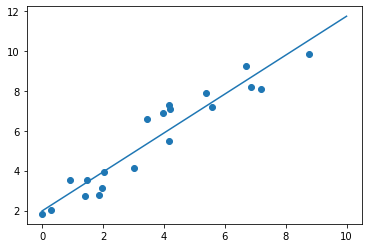

In [110]:
from sklearn import linear_model 
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

We can also return the relevant parameters of the coefficent (m) and the intercept (b). Note that these parameters are close estimates to that of our earlier parameters at the start. We scattered out data around the line `y = x + 2 `.

In [111]:
print('Coefficent: \n', model.coef_)
print('Intercept: \n ', model.intercept_)

Coefficent: 
 [0.97590079]
Intercept: 
  1.981359413091908


## Using Linear Regression with a Real Life Example

In the following cells, we will use a linear regression model to predict students' grades after taking in certain attributes, such as study time, failures, absences, grades, etc . . . We are taking this data from the University of Calfornia, Irvine database. This data contains attributes of students from two different schools. 

In [112]:
data = pd.read_csv('student-mat.csv', sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [119]:
data = data[['G1','G2','G3','studytime','failures','absences']]
data

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [135]:
predict = 'G3'
x=np.array(data.drop(columns=predict)) #without G3 column 
y=np.array(data[predict]) #only w/ G3 column

In [136]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

Let's figure out the accuracy of our model 

In [137]:
linear = LinearRegression() #calling linear regression function 
linear.fit(x_train, y_train)
accuracy = linear.score(x_test,y_test)
print(accuracy)

0.8957948823095347


In [138]:
print('Coefficent: \n', linear.coef_)
print('Intercept: \n ', linear.intercept_)

Coefficent: 
 [ 0.15770398  0.97301839 -0.21411441 -0.3596488   0.0371707 ]
Intercept: 
  -1.4185866446672133


In [139]:
predictions = linear.predict(x_test)
predictions

array([ 7.20211194,  5.0359766 ,  5.78293376, 10.39162683,  7.51800455,
       16.13311903, 15.28194267,  9.09114227, 13.94732444,  5.64690519,
        4.33935581, 15.71522014,  3.42910525,  7.74641687,  9.61811226,
       12.24224283, 15.71788392, 13.91786616,  7.04125954, 11.03717905,
       12.77236123, 19.91634427, 15.94726553,  5.85412674, 11.8884668 ,
        7.72837451, -0.95700201, 17.21776091, -0.26977565, 12.75496116,
       12.33196281, 10.65645087, 12.88256458,  8.03476129,  6.03665456,
        8.16794881, 16.25496107, 12.76921281, 10.27572268, 10.1180187 ])

In [140]:
for i in range(len(predictions)):
    print('Predicted:' , predictions[i], '|' ,
          'Attributes:', x_test[i],'|' ,
          'Actual:', y_test[i])

Predicted: 7.202111942184597 | Attributes: [8 8 1 1 4] | Actual: 8
Predicted: 5.0359765950630715 | Attributes: [ 6  6  2  2 22] | Actual: 4
Predicted: 5.782933756560835 | Attributes: [7 7 2 1 2] | Actual: 7
Predicted: 10.39162683186504 | Attributes: [13 10  2  1 22] | Actual: 11
Predicted: 7.518004547018018 | Attributes: [7 9 2 2 6] | Actual: 8
Predicted: 16.13311902818868 | Attributes: [15 16  3  0  7] | Actual: 15
Predicted: 15.281942674070232 | Attributes: [14 15  1  0  3] | Actual: 16
Predicted: 9.091142268005267 | Attributes: [11  9  2  0 12] | Actual: 9
Predicted: 13.94732443811873 | Attributes: [11 14  1  0  6] | Actual: 14
Predicted: 5.6469051928774 | Attributes: [5 8 2 3 0] | Actual: 7
Predicted: 4.339355806068714 | Attributes: [ 6  5  1  1 14] | Actual: 5
Predicted: 15.715220143603647 | Attributes: [14 16  3  0  0] | Actual: 16
Predicted: 3.429105247890554 | Attributes: [3 5 2 1 8] | Actual: 5
Predicted: 7.7464168713896004 | Attributes: [11  8  2  0  2] | Actual: 8
Predicted: